In [9]:
# 0. Imports & Setup
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pickle



sys.path.append('../src')
from functions import ModelTrainer

In [5]:
# 1. Load cleaned & scaled datasets
dev = pd.read_csv('../data/development_final_data.csv')
eval = pd.read_csv('../data/evaluation_final_data.csv')

# 1.1 Split into X and y
X_dev = dev.drop(columns='BMI').values
y_dev = dev['BMI'].values

X_eval = eval.drop(columns='BMI').values
y_eval = eval['BMI'].values

# 1.2 Instantiate the trainer
trainer = ModelTrainer(X_dev, y_dev, X_eval, y_eval)

In [6]:
# 2. Feature selection in order to be able to use Optuna
X_dev_selected, selected_idx = trainer.select_features_with_lasso()

Selected 14 features out of 56


In [7]:
# 4. Define Optuna search space and Tuning with Optuna
optuna_spaces = {
    'ElasticNet': {
        'alpha': ('loguniform', 1e-3, 1e2),
        'l1_ratio': ('uniform', 0.0, 1.0)
    },
    'SVR': {
        'C': ('loguniform', 1e-2, 1e2),
        'epsilon': ('loguniform', 1e-3, 1.0),
        'kernel': ('fixed', 'rbf')
    },
    'BayesianRidge': {
        'alpha_1': ('loguniform', 1e-7, 1e-3),
        'lambda_1': ('loguniform', 1e-7, 1e-3)
    }
}

optuna_results = trainer.train_and_evaluate_tuned_models_optuna(
    search_spaces=optuna_spaces,
    model_dir="../models_optuna",
    n_trials=50
)

[I 2025-04-11 20:25:37,433] A new study created in memory with name: no-name-c90fd970-4774-453e-af1f-496ba1f2a5b5
[I 2025-04-11 20:25:37,445] Trial 0 finished with value: 15.568347708232313 and parameters: {'alpha': 0.06534692517098464, 'l1_ratio': 0.5678158442460546}. Best is trial 0 with value: 15.568347708232313.
[I 2025-04-11 20:25:37,453] Trial 1 finished with value: 17.57261746128424 and parameters: {'alpha': 10.929679949930536, 'l1_ratio': 0.051910595073938914}. Best is trial 0 with value: 15.568347708232313.
[I 2025-04-11 20:25:37,460] Trial 2 finished with value: 15.601173531231378 and parameters: {'alpha': 0.01914641489772216, 'l1_ratio': 0.8883702910318252}. Best is trial 0 with value: 15.568347708232313.
[I 2025-04-11 20:25:37,469] Trial 3 finished with value: 15.587723431856233 and parameters: {'alpha': 0.040500709172450085, 'l1_ratio': 0.7281038275872806}. Best is trial 0 with value: 15.568347708232313.
[I 2025-04-11 20:25:37,476] Trial 4 finished with value: 15.587516137


Tuning ElasticNet with Optuna...


[I 2025-04-11 20:25:37,641] Trial 18 finished with value: 15.419066460400991 and parameters: {'alpha': 0.5511316330747197, 'l1_ratio': 0.01167601377794852}. Best is trial 17 with value: 15.408816702298115.
[I 2025-04-11 20:25:37,655] Trial 19 finished with value: 16.145298787319415 and parameters: {'alpha': 2.7302873016828175, 'l1_ratio': 0.006131165650091698}. Best is trial 17 with value: 15.408816702298115.
[I 2025-04-11 20:25:37,669] Trial 20 finished with value: 15.577196248658051 and parameters: {'alpha': 0.6005167589659947, 'l1_ratio': 0.1474653333450573}. Best is trial 17 with value: 15.408816702298115.
[I 2025-04-11 20:25:37,684] Trial 21 finished with value: 15.541759349981717 and parameters: {'alpha': 0.588691531104135, 'l1_ratio': 0.12384729494421076}. Best is trial 17 with value: 15.408816702298115.
[I 2025-04-11 20:25:37,698] Trial 22 finished with value: 15.454610801505627 and parameters: {'alpha': 0.22248033133019965, 'l1_ratio': 0.15164062814891782}. Best is trial 17 wi

Best hyperparameters for ElasticNet: {'alpha': 0.3039662897518373, 'l1_ratio': 0.004357091520935805}
Model saved to ../models_optuna/ElasticNet_FS_TUNED.joblib
Evaluating tuned ElasticNet model on evaluation set...


[I 2025-04-11 20:25:38,909] A new study created in memory with name: no-name-1e260473-3882-4fe0-84b0-c8ce62a2c1d9
[I 2025-04-11 20:25:38,963] Trial 0 finished with value: 15.620306113649299 and parameters: {'C': 6.416889982445656, 'epsilon': 0.07270134866779819}. Best is trial 0 with value: 15.620306113649299.
[I 2025-04-11 20:25:39,013] Trial 1 finished with value: 16.977590302121328 and parameters: {'C': 37.722116767659195, 'epsilon': 0.9352474866434506}. Best is trial 0 with value: 15.620306113649299.
[I 2025-04-11 20:25:39,057] Trial 2 finished with value: 15.684370766881004 and parameters: {'C': 0.8177809761250425, 'epsilon': 0.006288895383199918}. Best is trial 0 with value: 15.620306113649299.


--- ElasticNet (FS + Optuna Tuning) Evaluation Summary ---
RMSE:  mean = 3.6025, median = 3.5947, 95% CI = (3.0595, 4.2477)
MAE:   mean = 2.5035, median = 2.4975, 95% CI = (2.1747, 2.8553)
R²:    mean = 0.1643, median = 0.1632, 95% CI = (0.0644, 0.2601)

Tuning SVR with Optuna...


[I 2025-04-11 20:25:39,111] Trial 3 finished with value: 15.987229802742204 and parameters: {'C': 11.214762186423442, 'epsilon': 0.30883401497797247}. Best is trial 0 with value: 15.620306113649299.
[I 2025-04-11 20:25:39,154] Trial 4 finished with value: 16.219882105239822 and parameters: {'C': 0.1827292794412347, 'epsilon': 0.47040520314946593}. Best is trial 0 with value: 15.620306113649299.
[I 2025-04-11 20:25:39,194] Trial 5 finished with value: 17.258126460157268 and parameters: {'C': 0.011118181787248167, 'epsilon': 0.1537796419491894}. Best is trial 0 with value: 15.620306113649299.
[I 2025-04-11 20:25:39,237] Trial 6 finished with value: 16.417156143243485 and parameters: {'C': 0.05026943524075567, 'epsilon': 0.023590993169790856}. Best is trial 0 with value: 15.620306113649299.
[I 2025-04-11 20:25:39,275] Trial 7 finished with value: 15.711256756776251 and parameters: {'C': 0.648275682381717, 'epsilon': 0.07971675362368547}. Best is trial 0 with value: 15.620306113649299.
[I 

Best hyperparameters for SVR: {'C': 4.0216281312826325, 'epsilon': 0.2303975044079997}
Model saved to ../models_optuna/SVR_FS_TUNED.joblib
Evaluating tuned SVR model on evaluation set...


[I 2025-04-11 20:25:45,459] A new study created in memory with name: no-name-bc499007-5b1b-4fb2-81d8-2c7e6a5010f4
[I 2025-04-11 20:25:45,473] Trial 0 finished with value: 15.41399405833066 and parameters: {'alpha_1': 4.461608236780465e-07, 'lambda_1': 2.489687969769269e-06}. Best is trial 0 with value: 15.41399405833066.
[I 2025-04-11 20:25:45,481] Trial 1 finished with value: 15.413994115529457 and parameters: {'alpha_1': 0.00012883303220137242, 'lambda_1': 1.4417911264386332e-06}. Best is trial 0 with value: 15.41399405833066.
[I 2025-04-11 20:25:45,493] Trial 2 finished with value: 15.41399408290396 and parameters: {'alpha_1': 1.3610653369173336e-07, 'lambda_1': 3.4850978454529466e-07}. Best is trial 0 with value: 15.41399405833066.
[I 2025-04-11 20:25:45,502] Trial 3 finished with value: 15.413994078412138 and parameters: {'alpha_1': 2.0387614772675588e-07, 'lambda_1': 7.402397064671896e-07}. Best is trial 0 with value: 15.41399405833066.
[I 2025-04-11 20:25:45,514] Trial 4 finishe

--- SVR (FS + Optuna Tuning) Evaluation Summary ---
RMSE:  mean = 3.5693, median = 3.5629, 95% CI = (3.0129, 4.1725)
MAE:   mean = 2.3703, median = 2.3628, 95% CI = (2.0395, 2.7086)
R²:    mean = 0.1797, median = 0.181, 95% CI = (0.0916, 0.2597)

Tuning BayesianRidge with Optuna...


[I 2025-04-11 20:25:45,664] Trial 14 finished with value: 15.413992292651018 and parameters: {'alpha_1': 0.0008102993626159076, 'lambda_1': 0.00018035955608186371}. Best is trial 11 with value: 15.413983988379737.
[I 2025-04-11 20:25:45,682] Trial 15 finished with value: 15.413992350059003 and parameters: {'alpha_1': 0.000514191114268477, 'lambda_1': 0.00016635135926328865}. Best is trial 11 with value: 15.413983988379737.
[I 2025-04-11 20:25:45,700] Trial 16 finished with value: 15.413984529709344 and parameters: {'alpha_1': 1.040919013853954e-05, 'lambda_1': 0.0008296111526265471}. Best is trial 11 with value: 15.413983988379737.
[I 2025-04-11 20:25:45,719] Trial 17 finished with value: 15.413992512808672 and parameters: {'alpha_1': 3.905715629107558e-06, 'lambda_1': 0.00013667434095499645}. Best is trial 11 with value: 15.413983988379737.
[I 2025-04-11 20:25:45,735] Trial 18 finished with value: 15.413994042838283 and parameters: {'alpha_1': 0.00023351177213225854, 'lambda_1': 1.093

Best hyperparameters for BayesianRidge: {'alpha_1': 2.052724368273154e-07, 'lambda_1': 0.0009979433215769641}
Model saved to ../models_optuna/BayesianRidge_FS_TUNED.joblib
Evaluating tuned BayesianRidge model on evaluation set...
--- BayesianRidge (FS + Optuna Tuning) Evaluation Summary ---
RMSE:  mean = 3.5985, median = 3.5905, 95% CI = (3.058, 4.2397)
MAE:   mean = 2.5124, median = 2.5059, 95% CI = (2.1875, 2.8656)
R²:    mean = 0.1659, median = 0.1651, 95% CI = (0.0595, 0.267)


In [11]:
# 5. Load previous evaluation results and append Optuna results
with open('../eval_results/all_eval_results.pkl', 'rb') as f:
    all_eval_results = pickle.load(f)

for model in ['ElasticNet', 'SVR', 'BayesianRidge']:
    all_eval_results[model]['Optuna'] = optuna_results[model]['raw']

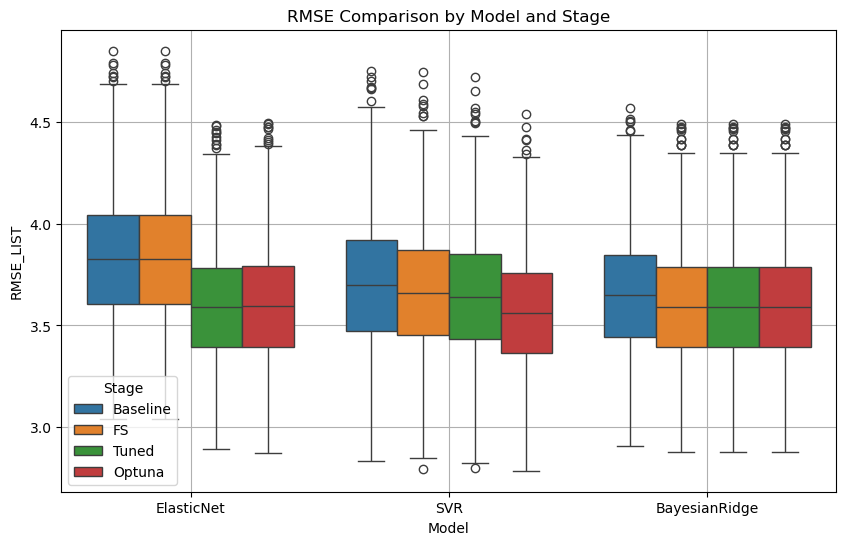

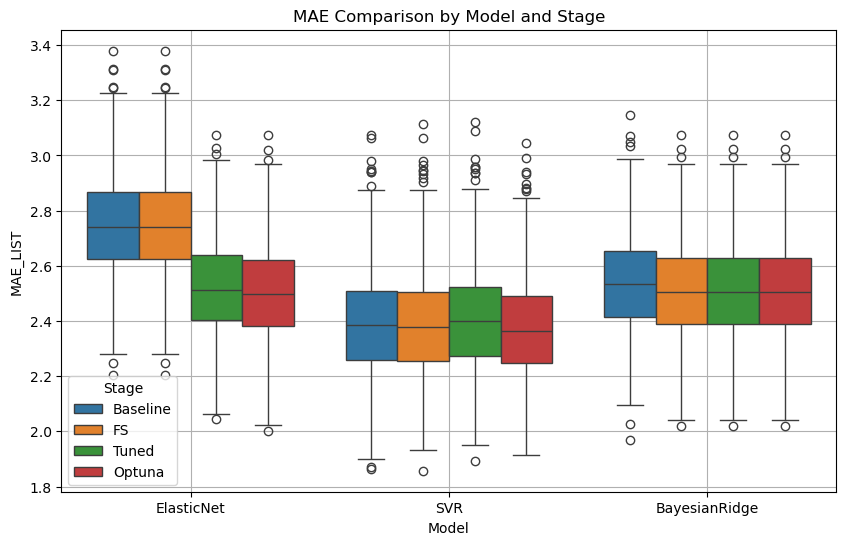

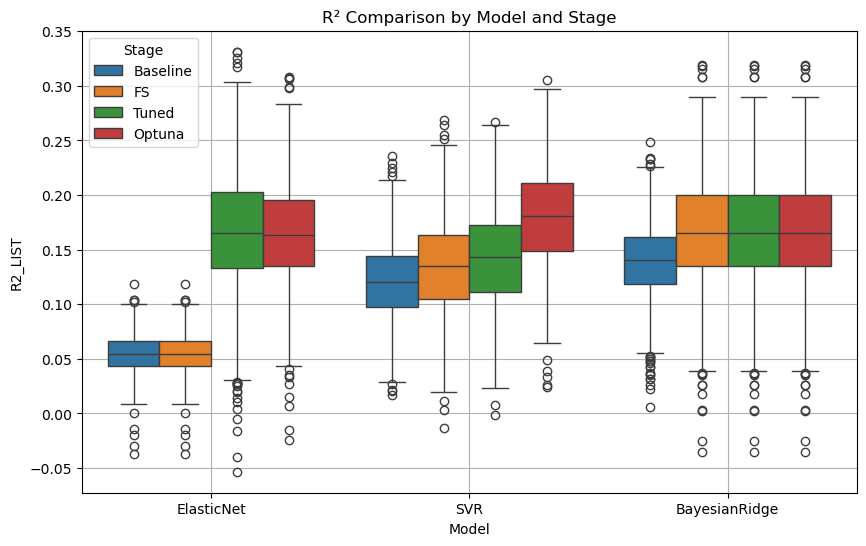

In [14]:
# 6. Generate boxplots
trainer.plot_metric_boxplots('rmse_list', all_eval_results, 'RMSE')
trainer.plot_metric_boxplots('mae_list', all_eval_results, 'MAE')
trainer.plot_metric_boxplots('r2_list', all_eval_results, 'R²')
